# ford go bike Data Exploration
## by Jawaher Alzahrani

## Preliminary Wrangling

> Ford GoBike System Data This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline
import warnings
warnings.simplefilter("ignore")

> Load  dataset fordgobike

In [32]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [33]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### What is the structure of your dataset?

> There are 183412 records of trip in the dataset and Most variables are numeric in nature, but the variables user_type,station names are cateogrical in nature.                                                                                                
This Dataset cincludes information about individual rides of users in San Francisco Bay Area with 15 features :-                
Trip Duration (seconds)                                                                                                         
Start Time and Date                                                                                                             
End Time and Date                                                                                                               
Start Station ID                                                                                                               
Start Station Name                                                                                                             
Start Station Latitude                                                                                                         
Start Station Longitude                                                                                                         
End Station ID                                                                                                                 
End Station Name                                                                                                               
End Station Latitude                                                                                                           
End Station Longitude                                                                                                           
Bike ID                                                                                                                         
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)                                               
Member Year of Birth                                                                                                           
Member Gender                                                                                                                   
bike_share_for_all_trip 

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of the trip in the dataset. and have some qusetion to help analysis:  
What the most using of biking men or women ?                                                                                   
What is the average age of biking rider?                                                                                       
Dose duration trip effected by gender and age?                                                                                 
Does User Type (Subscriber or Customer) affect the duration?                                                                   
What are the preferred days for gender and users type ?                                                                                             

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Member age , Member Gender , User Type

## Data Wrangling

> Here make some changes in dataset for better results in data analysis:
- drop missing value 
- Separate date and time from 'start_time' and 'end_time'
- Erroneous datatypes for 'bike_id' and 'start_station_id'to object 
- change datatypes for 'user_type' to category
- calculate age member from 'Member_Year_of_Birth'



In [34]:
# drop missing value in many row 
df.dropna(inplace=True)

In [35]:
# Convert datatype for start time and endtime to datetime64 type
# and spareate date from time column 
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['start_time'] = pd.to_datetime(df['start_time']).dt.time

df['end_date'] = pd.to_datetime(df['end_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.time


In [36]:
df['start_date_month'] = pd.DatetimeIndex(df['start_date']).month
df['start_date_day'] = pd.DatetimeIndex(df['start_date']).day

In [37]:
#df['start_time_hour'] = pd.DatetimeIndex(df['start_time']).hour

In [38]:
df['duration_min']=df['duration_sec']/60
df['duration_hour']=df['duration_min']/60
df['duration_min']=df['duration_min'].astype(float)
df['duration_hour']=df['duration_hour'].astype(float)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_date_month,start_date_day,duration_min,duration_hour
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,2019-03-01,2,28,869.750000,14.495833
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,2019-03-01,2,28,1030.900000,17.181667
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,2,28,608.166667,10.136111
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,2,28,26.416667,0.440278
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,2,28,29.883333,0.498056


In [39]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,end_date,start_date_month,start_date_day,duration_min,duration_hour
0,52185,17:32:10.145000,08:01:55.975000,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,2019-03-01,2,28,869.750000,14.495833
2,61854,12:13:13.218000,05:24:08.146000,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,2019-03-01,2,28,1030.900000,17.181667
3,36490,17:54:26.010000,04:02:36.842000,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,2019-03-01,2,28,608.166667,10.136111
4,1585,23:54:18.549000,00:20:44.074000,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,2019-03-01,2,28,26.416667,0.440278
5,1793,23:49:58.632000,00:19:51.760000,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,2019-03-01,2,28,29.883333,0.498056


In [40]:
#df['start_date'] = df.start_time.astype('datetime64[ns]')
#df['end_date'] = df.end_time.astype('datetime64[ns]')
# Convert datatype for user_type to category type: Subscriber and Customer  
df['user_type'] = df.user_type.astype('category')
df['member_gender'] = df.member_gender.astype('category')
df['start_station_name'] = df.start_station_name.astype('category')
df['bike_id'] = df.bike_id.astype('object')
df['start_station_id'] = df.start_station_id.astype('object')
df['end_station_id'] = df.end_station_id.astype('object')

In [41]:
# Convert datatype for member_birth_year to int32 type
df['member_birth_year'] = df.member_birth_year.astype('int32')
df['member_age'] = 2020-df['member_birth_year']

In [42]:
# here we have two type Subscriber and Customer    
df.user_type.value_counts() # 163544
# 19868

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [43]:
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [44]:
df.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Farnam St at Fruitvale Ave                                      9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174952 non-null  int64   
 1   start_time               174952 non-null  object  
 2   end_time                 174952 non-null  object  
 3   start_station_id         174952 non-null  object  
 4   start_station_name       174952 non-null  category
 5   start_station_latitude   174952 non-null  float64 
 6   start_station_longitude  174952 non-null  float64 
 7   end_station_id           174952 non-null  object  
 8   end_station_name         174952 non-null  object  
 9   end_station_latitude     174952 non-null  float64 
 10  end_station_longitude    174952 non-null  float64 
 11  bike_id                  174952 non-null  object  
 12  user_type                174952 non-null  category
 13  member_birth_year        174952 non-null  in

In [46]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,start_date_month,start_date_day,duration_min,duration_hour,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,2.0,15.312337,11.733379,0.195556,35.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,0.0,8.033926,27.370082,0.456168,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,2.0,1.000000,1.016667,0.016944,19.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,2.0,8.000000,5.383333,0.089722,28.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,2.0,15.000000,8.500000,0.141667,33.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,2.0,22.000000,13.150000,0.219167,40.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,2.0,28.000000,1409.133333,23.485556,142.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables.

> This hist plot indicates we have outliers since we have values greater 3 hours on the x-axis.These values are not seen on the histplot.The code in the next slide shows the average minutes that spend user in trip between 10-12 minutes.

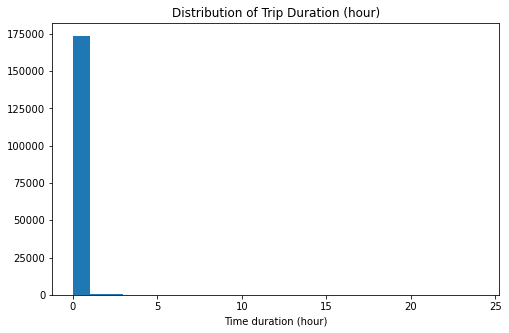

In [47]:
# start with a standard-scaled plot
binsize = 1
bins = np.arange(0, df['duration_hour'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hour', bins = bins)
plt.xlabel('Time duration (hour)')
plt.title('Distribution of Trip Duration (hour)')
plt.show()

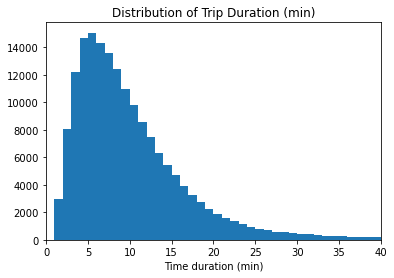

In [48]:
bins = np.arange(0, df['duration_min'].max()+1, 1)
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xlim([0,40])
plt.xlabel('Time duration (min)')
plt.title('Distribution of Trip Duration (min)')
plt.show();

In [49]:
df['duration_min'].mean()

11.733379060161425

> This bar plot indicates we have 3 category of gender .It depicts  the percentage of bike users  74.59 % male  and 23.32% female ,This indicates that  the most bike riders are  Male.

Text(0, 0.5, 'count')

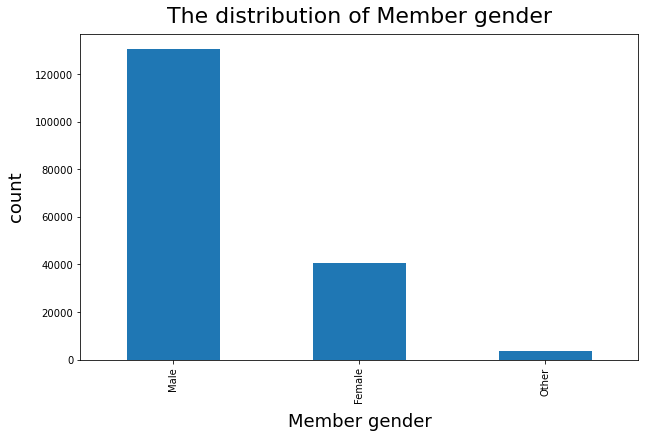

In [50]:
plt.figure(figsize=(10,6))

gender= df['member_gender'].value_counts().plot.bar()
gender.set_xticklabels(['Male','Female' , 'Other'])
plt.title(' The distribution of Member gender ', fontsize=22, y=1.015)
plt.xlabel('Member gender', fontsize=18, labelpad=10)
plt.ylabel('count', fontsize=18, labelpad=10)


>This boxplot indicates the average of age who used bike between 33 to 35 years . we have outliers since we have values greater 100 years on the x-axis.

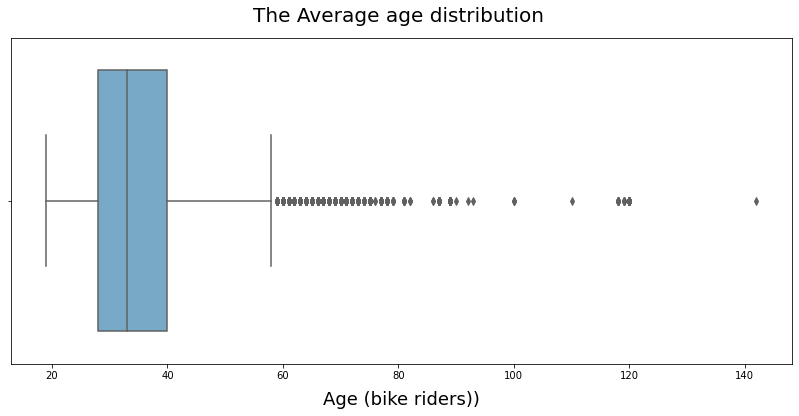

In [51]:
plt.figure(figsize=(14,6))
sb.boxplot(x='member_age', data=df, palette='Blues', orient='h')
plt.title("The Average age distribution ", fontsize=20, y=1.03)
plt.xlabel("Age (bike riders))", fontsize=18, labelpad=10);

In [52]:
df2 = df[(df['member_age'] <= 60)]

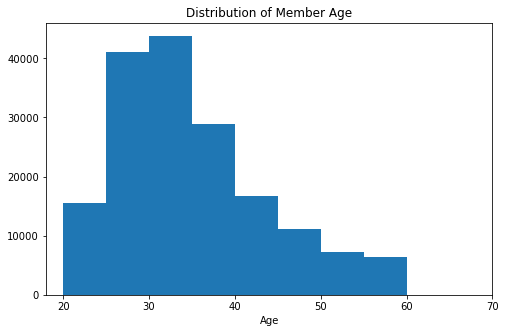

In [53]:
# plot distribution of age
plt.figure(figsize = [8, 5])

binsize = 5
bins = np.arange(0, df2['member_age'].max()+binsize, binsize)

plt.hist(data = df2, x = 'member_age', bins = bins)
plt.xlim(18, 70)
plt.xlabel('Age')
plt.title('Distribution of Member Age')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In variable duration_sec:  I did some operation to transfor  duration of seconds to duration of hours and represent by hist chart.the distribution  it was  approxplity spend less than 3 hours and the average of minutes betwwen 10-12. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I used other variables like member_age the age distribution of Ford goBike riders it have many outliers, so I removed outliers and put dataset into df2
Also member_gender  and user_type column change datatype to category becaues it have type.


## Bivariate Exploration


>  Relationships between gender and age bike riders, I used the boxplot to find the relationship between age and gender for  bike riders as there is no significant difference, as the average age of females is 33 and men are 34 years.

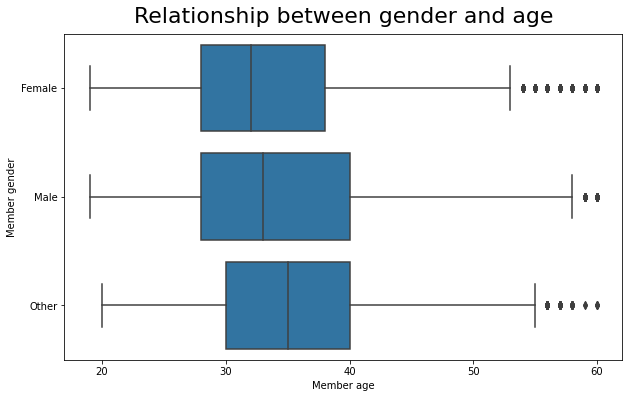

In [54]:
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.boxplot(data=df2, y='member_gender', x='member_age', color=base_color)
plt.title('Relationship between gender and age', fontsize=22, y=1.015)
plt.xlabel('Member age')
plt.ylabel('Member gender');

>  Relationships between gender and user_type bike riders, I used the countplot to find how many females and males there are in each user type.I find that customers type have the lowest percentage of subscribers type   for both gender. And subscribers type were more men than women.

Text(0, 0.5, 'count')

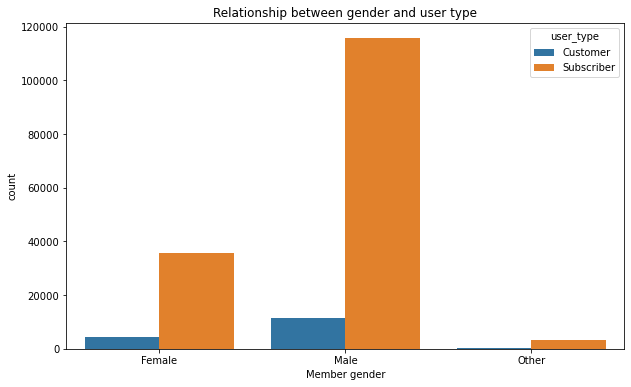

In [55]:
plt.figure(figsize=(10,6))
sb.countplot(data = df2, x = 'member_gender', hue = 'user_type')
plt.title('Relationship between gender and user type')
plt.xlabel('Member gender')
plt.ylabel('count')

> I want to see if there any relationships between the duration trip (minute) and the members ages  by scatter plot but as we can see in the figure there is no positive or negative relationship and we don’t any relationship between them at all.

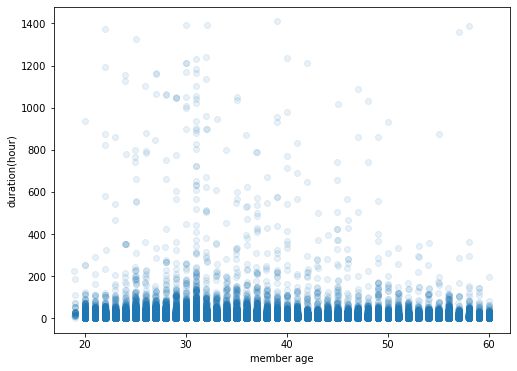

In [56]:
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df2, x = 'member_age', y = 'duration_min', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('member age')
plt.ylabel('duration(hour)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I find that customers type have the lowest percentage of subscribers type for both gender. And subscribers type were more men than women. There is no significant difference the relationship between age and gender for  bike riders , as the average age of females is 33 and men are 34 years . Also, there is no positive or negative relationship and we don’t any relationship between  the duration trip (minute) and the members ages.The goal of knowing the relationships so that we know what will be targeted in the future, female or male, also a customer or subscriber, and how long does a person spend on the trip.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> maybe used month extract from start_date to konw What is the month has high demand? 

## Multivariate Exploration


> Here I used barplot to know  how many bikes rider of gender and which the most type. I find that customers type have the lowest percentage of subscribers type for both gender. And subscribers type were more men than women. 

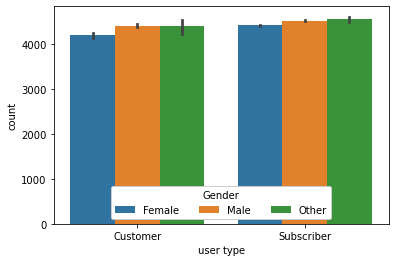

In [57]:
ax = sb.barplot(data = df2, x = 'user_type', y = 'bike_id', hue = 'member_gender')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Gender')
plt.xlabel('user type')
plt.ylabel('count');


In [58]:
df2['member_age_Range'] = df2.member_age.apply(lambda x: 'Child' if 10<x<=17
                                                  else 'Young Adults' if 18<=x<=39
                                                  else 'Middle_aged Adults' if 40<=x<=59
                                                  else 'Old Adults' if 60<=x<100
                                                  else x)

df2['member_age_Range'] = df2.member_age_Range.astype('category')

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170798 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             170798 non-null  int64   
 1   start_time               170798 non-null  object  
 2   end_time                 170798 non-null  object  
 3   start_station_id         170798 non-null  object  
 4   start_station_name       170798 non-null  category
 5   start_station_latitude   170798 non-null  float64 
 6   start_station_longitude  170798 non-null  float64 
 7   end_station_id           170798 non-null  object  
 8   end_station_name         170798 non-null  object  
 9   end_station_latitude     170798 non-null  float64 
 10  end_station_longitude    170798 non-null  float64 
 11  bike_id                  170798 non-null  object  
 12  user_type                170798 non-null  category
 13  member_birth_year        170798 non-null  in

> I want know which the preferred days for gender and users type and how many long time spend .From the two charts below, it's depicts that both of them are in the same range between 10-20 minutes, but slightly fluctuating on customer side  

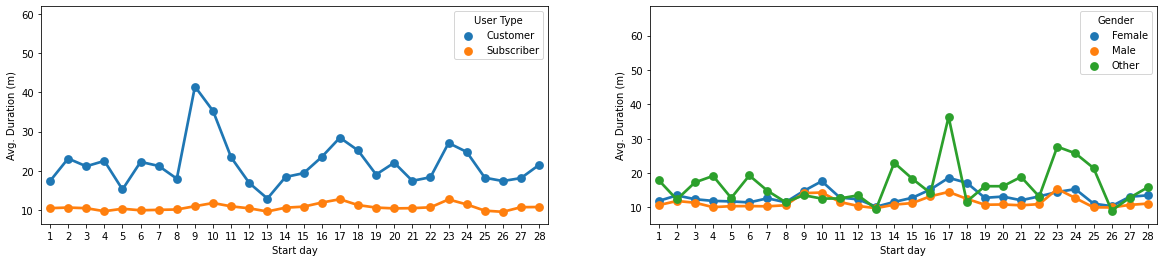

In [67]:
plt.figure(figsize=[20, 4])

# the point plot of day vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=df2, x='start_date_day', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Start day')
plt.ylabel('Avg. Duration (m)')
plt.legend(title='User Type')

# the point plot of day vs gender
plt.subplot(1, 2, 2)
sb.pointplot(data=df2, x='start_date_day', y='duration_min', hue='member_gender', errwidth=0)
plt.xlabel('Start day')
plt.ylabel('Avg. Duration (m)')
plt.legend(title='Gender');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here I used barplot to know  how many bikes rider of gender and which the most type. I find that customers type have the lowest percentage of subscribers type for both gender. And subscribers type were more men than women. 

### Were there any interesting or surprising interactions between features?

> yes, Through the analysis, we find that bikes rider often take between 10-20 minutes.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!